# Projet IA01

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


heart = pd.read_csv("heart.csv")


# Analyse exploratoire des données

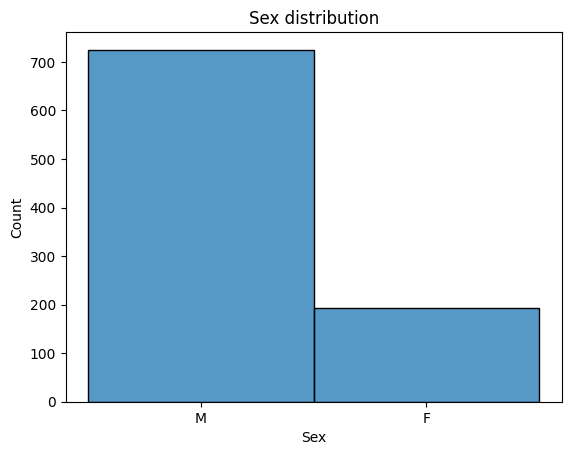

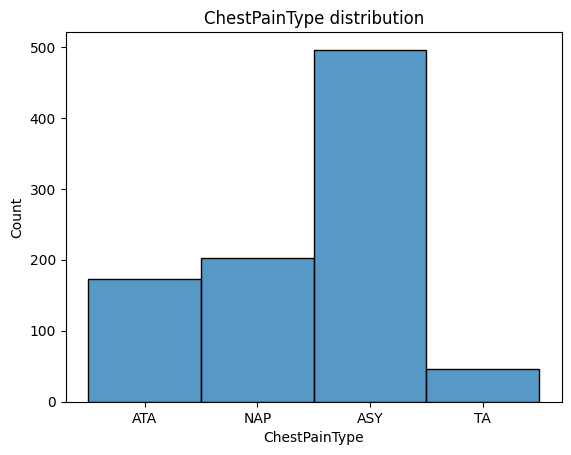

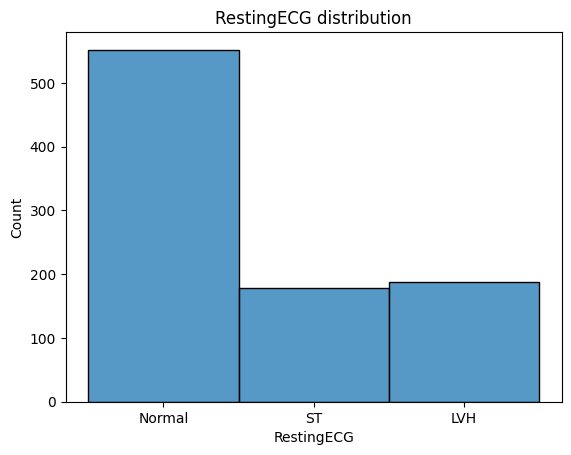

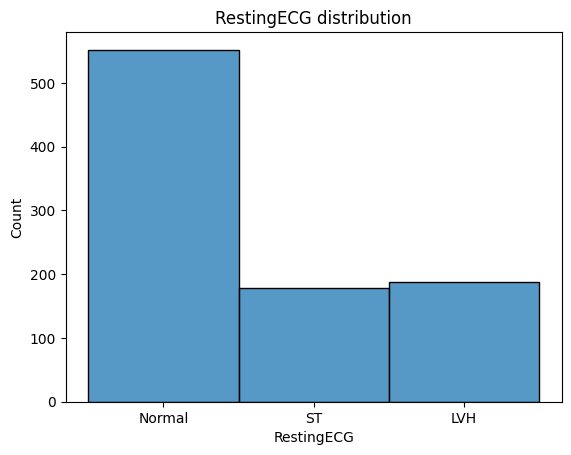

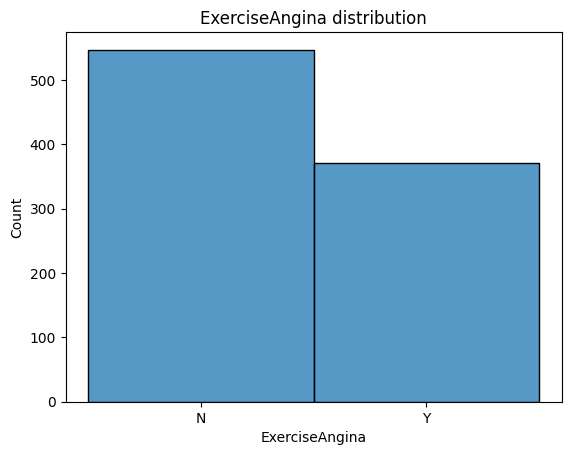

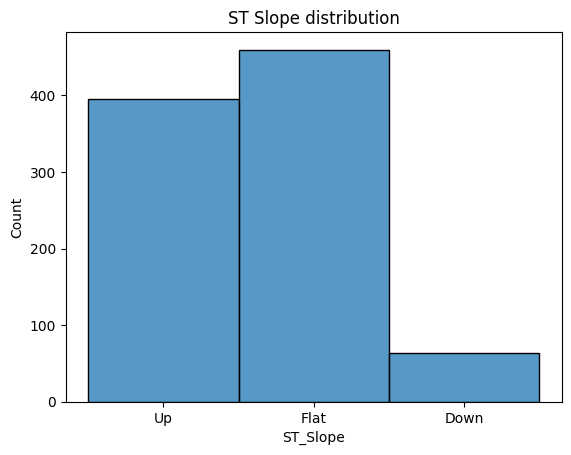

In [2]:
#distribution des variables catégorielles
plt.figure()
sns.histplot(x='Sex', data=heart)
plt.title('Sex distribution')
plt.show()

plt.figure()
sns.histplot(x='ChestPainType', data=heart)
plt.title('ChestPainType distribution')
plt.show()

plt.figure()
sns.histplot(x='RestingECG', data=heart)
plt.title('RestingECG distribution')
plt.show()

plt.figure()
sns.histplot(x='RestingECG', data=heart)
plt.title('RestingECG distribution')
plt.show()

plt.figure()
sns.histplot(x='ExerciseAngina', data=heart)
plt.title('ExerciseAngina distribution')
plt.show()

plt.figure()
sns.histplot(x='ST_Slope', data=heart)
plt.title('ST Slope distribution')
plt.show()


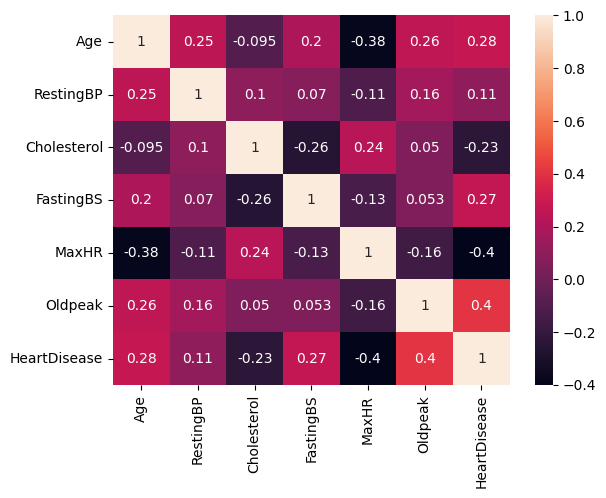

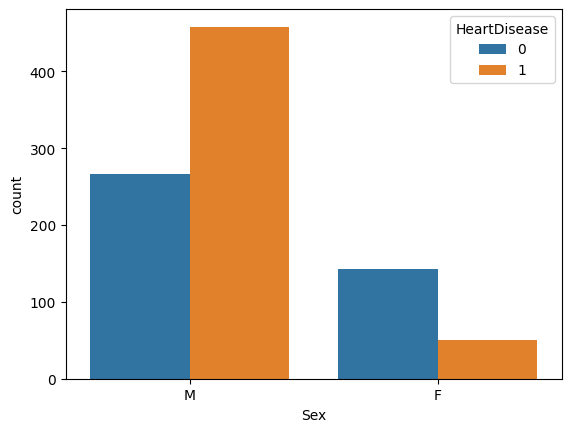

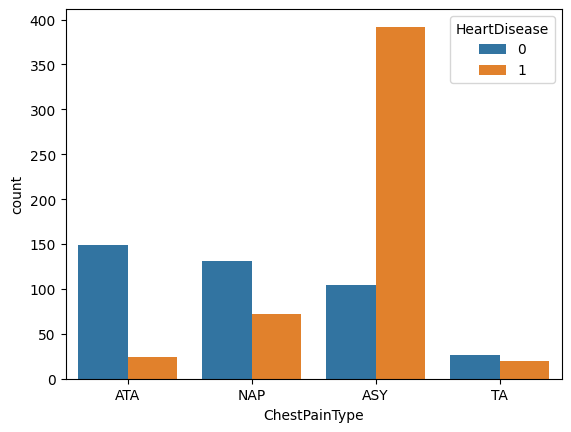

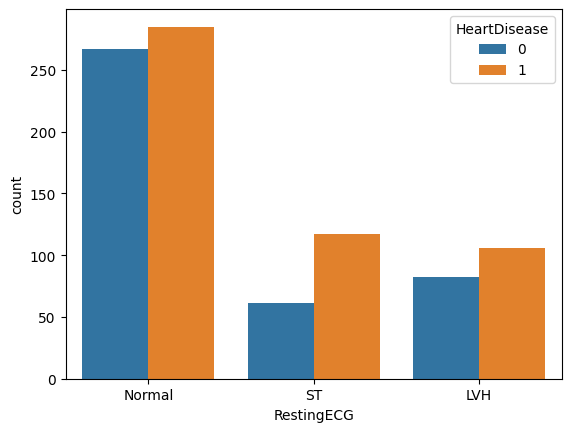

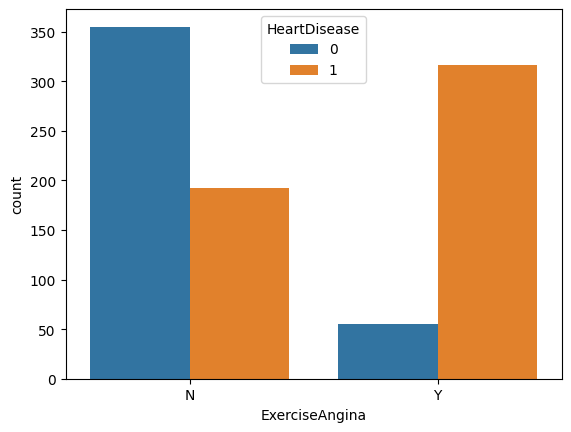

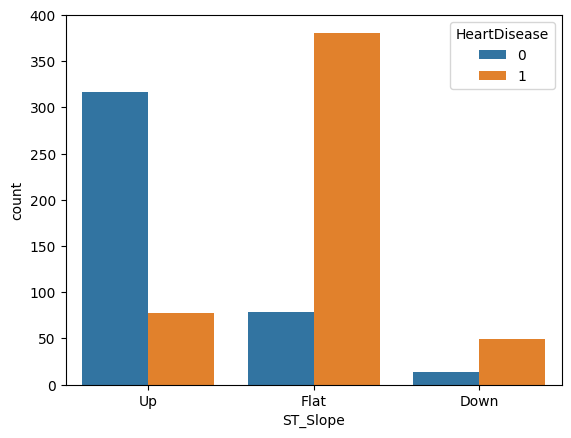

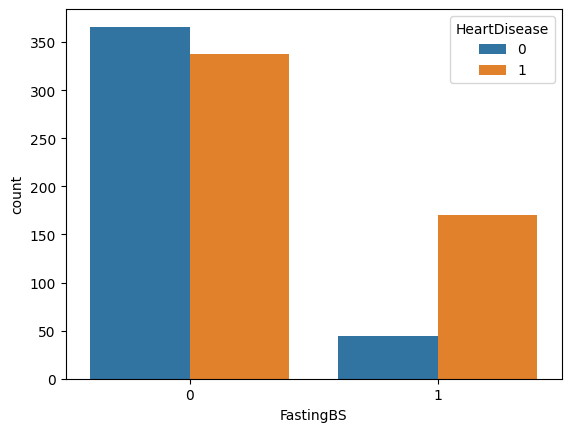

In [3]:
#les variables catégorielles ont-elles un impact sur HeartDisease ?

matrice_corr = heart.corr(numeric_only=True)
sns.heatmap(matrice_corr, annot=True)
plt.show()

sns.countplot(x=heart['Sex'], hue=heart['HeartDisease'])
plt.show()

sns.countplot(x=heart['ChestPainType'], hue=heart['HeartDisease'])
plt.show()

sns.countplot(x=heart['RestingECG'], hue=heart['HeartDisease'])
plt.show()

sns.countplot(x=heart['ExerciseAngina'], hue=heart['HeartDisease'])
plt.show()

sns.countplot(x=heart['ST_Slope'], hue=heart['HeartDisease'])
plt.show()

sns.countplot(x=heart['FastingBS'], hue=heart['HeartDisease'])
plt.show()

Number of Duplicates: 0 

Nombre de NaN : 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Minimums des colonnes numeriques : 
Age            28.0
RestingBP       0.0
Cholesterol     0.0
MaxHR          60.0
Oldpeak        -2.6
Name: min, dtype: float64
Valeurs uniques des variables catégorielles : 

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
[0 1]
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']
[0 1]


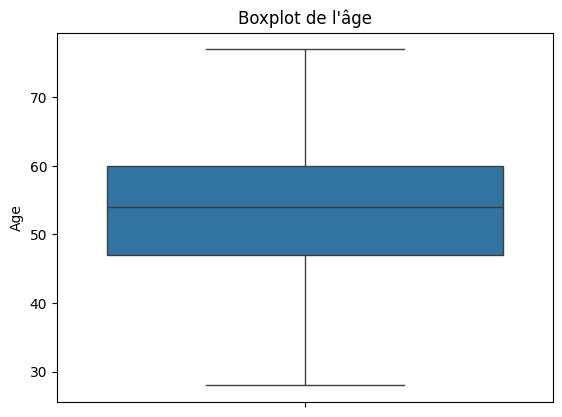

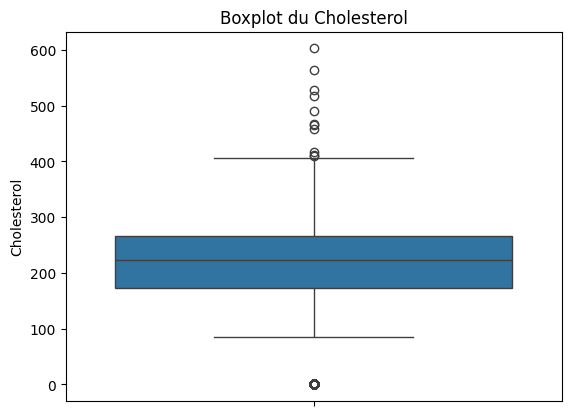

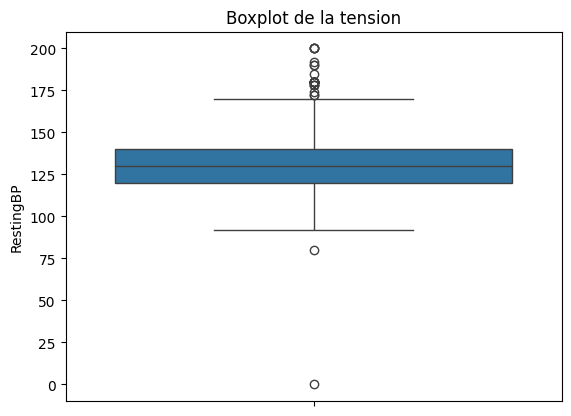

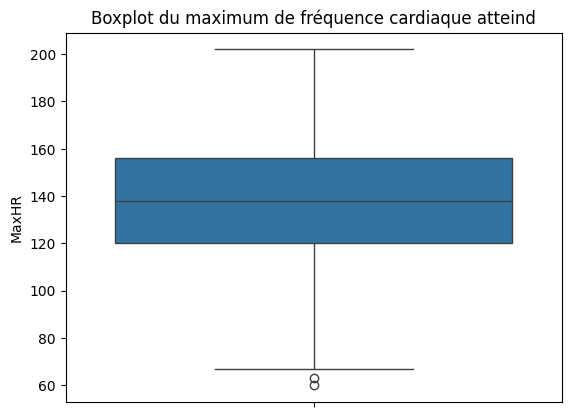

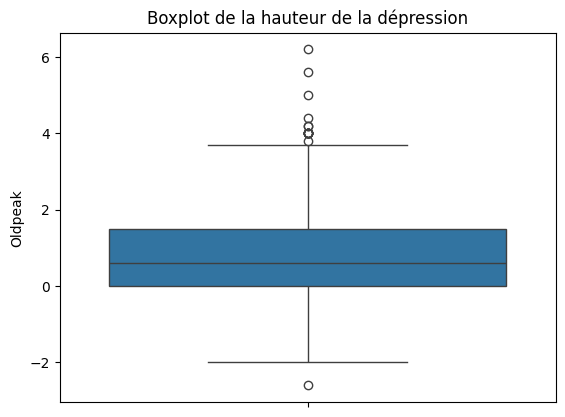

c'est bon ça marche


In [4]:
#identification des valeurs manquantes et aberrantes :

heart['FastingBS'] = heart['FastingBS'].astype(object)
heart['HeartDisease'] = heart['HeartDisease'].astype(object)

print("Number of Duplicates:", heart.duplicated().sum(), "\n") #nombre de doublon
print("Nombre de NaN : \n" , heart.isna().sum()) #nombre de données manquantes
    

num_df = heart.select_dtypes(include=['int64', 'float64'])

min_values = num_df.describe().loc['min']

print("Minimums des colonnes numeriques : ")
print(min_values)

cat_df = heart.select_dtypes(include=['object'])

print("Valeurs uniques des variables catégorielles : \n")
for col in cat_df.columns :
    unique_value = cat_df[col].unique()
    print(unique_value)

sns.boxplot(y=heart['Age'])
plt.title("Boxplot de l'âge")
plt.show()

sns.boxplot(y=heart['Cholesterol'])
plt.title("Boxplot du Cholesterol")
plt.show()
    
sns.boxplot(y=heart['RestingBP'])
plt.title("Boxplot de la tension")
plt.show()

sns.boxplot(y=heart['MaxHR'])
plt.title("Boxplot du maximum de fréquence cardiaque atteind")
plt.show()

sns.boxplot(y=heart['Oldpeak'])
plt.title("Boxplot de la hauteur de la dépression")
plt.show()

print("c'est bon ça marche")

### Traitons maintenant les données manquantes

In [5]:
#Nettoyage du dataframe
# Supprimer les doublons
heart = heart.drop_duplicates()

# Remplacer les valeurs aberrantes (0 en valeurs manquantes pour les colonnes numériques)
# On peut aussi remplacer par la médianne poru éviter 
heart['Cholesterol'] = heart['Cholesterol'].replace(0, heart['Cholesterol'][heart['Cholesterol'] != 0].mean())
heart['RestingBP'] = heart['RestingBP'].replace(0, heart['RestingBP'][heart['RestingBP'] != 0].mean())


# Encoder LabelEncoder pour Sex et ExerciseAngina
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_angina = LabelEncoder()
heart['Sex'] = le_sex.fit_transform(heart['Sex'])
heart['ExerciseAngina'] = le_angina.fit_transform(heart['ExerciseAngina'])

# One-Hot Encoding pour ChestPainType, RestingECG et ST_Slope
heart = pd.get_dummies(heart, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

print(heart.head())

   Age  Sex  RestingBP  Cholesterol FastingBS  MaxHR  ExerciseAngina  Oldpeak  \
0   40    1      140.0        289.0         0    172               0      0.0   
1   49    0      160.0        180.0         0    156               0      1.0   
2   37    1      130.0        283.0         0     98               0      0.0   
3   48    0      138.0        214.0         0    108               1      1.5   
4   54    1      150.0        195.0         0    122               0      0.0   

  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0            0               True              False             False   
1            1              False               True             False   
2            0               True              False             False   
3            1              False              False             False   
4            0              False               True             False   

   RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  ST_Slope_Up  
0 

### Puis les données abérrantes

##### On a décidé de supprimer les données qui sortaient des box plots

In [6]:
# Sélection des colonnes numériques
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Calcul des bornes IQR
Q1 = heart[numeric_cols].quantile(0.25)
Q3 = heart[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers_mask = (heart[numeric_cols] < lower_bound) | (heart[numeric_cols] > upper_bound)

# Résultats
print("Nombre d'outliers par variable (après imputation des 0) :")
print(outliers_mask.sum())

total_outlier_rows = outliers_mask.any(axis=1).sum()
total_rows = len(heart)
percent = (total_outlier_rows / total_rows) * 100


# Affichage des bornes
print("\nBornes utilisées :")
print(pd.DataFrame({'Lower': lower_bound, 'Upper': upper_bound}))

Nombre d'outliers par variable (après imputation des 0) :
Age             0
RestingBP      27
Cholesterol    41
MaxHR           2
Oldpeak        16
dtype: int64

Bornes utilisées :
              Lower   Upper
Age           27.50   79.50
RestingBP     90.00  170.00
Cholesterol  134.50  346.50
MaxHR         66.00  210.00
Oldpeak       -2.25    3.75


##### En cherchant un petit peu et en annalysant plus en profondeur ces données, on remarque que les outliers détectés par les boîtes à moustache ne sont pas très pertinents. En effet, tous sont très significatif sur l'état du patient. De plus en cherchant sur internet, ces données ne sont pas impossibles mais témoignent justement d'un serieux problème.

In [7]:

for i in numeric_cols: 
    Q1 = heart[i].quantile(0.25)
    Q3 = heart[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if i == 'MaxHR':
        print(heart[(heart[i] < lower) | (heart[i] > upper)][[i,'HeartDisease']].sort_values(by=i,ascending=True).head(5))
    else:
        print(heart[(heart[i] < lower) | (heart[i] > upper)][[i,'HeartDisease']].sort_values(by=i, ascending=False).head(5))

Empty DataFrame
Columns: [Age, HeartDisease]
Index: []
     RestingBP HeartDisease
241      200.0            1
365      200.0            1
399      200.0            1
732      200.0            1
759      192.0            1
     Cholesterol HeartDisease
149        603.0            1
616        564.0            0
76         529.0            1
30         518.0            1
250        491.0            1
     MaxHR HeartDisease
390     60            1
370     63            1
     Oldpeak HeartDisease
850      6.2            1
771      5.6            1
166      5.0            1
900      4.4            1
702      4.2            0


##### On voit clairement ici que ces valeurs identifiées comme abérrantes ont un sens puisqu'elles traduisent presques toutes une maladie.

## Train/Test split + standardisation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Y = heart['HeartDisease']
X = heart.drop(['HeartDisease'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

# Centrées réduites de notre dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
heart.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True


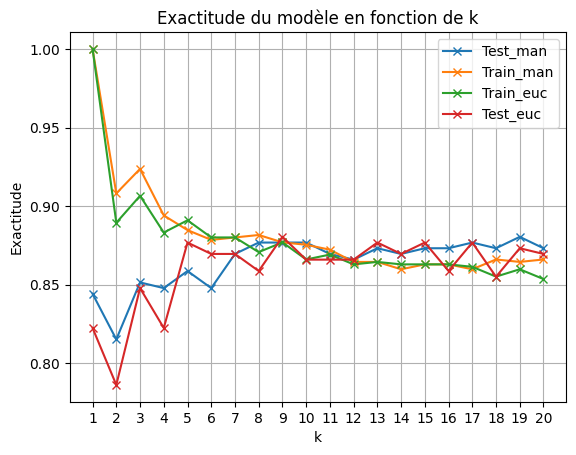

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Tester plusieurs valeurs de k
k_values = range(1, 21)
accuracies_test_man = []
accuracies_train_man = []

accuracies_test_euc=[]
accuracies_train_euc=[]

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn_classifier.fit(X_train_scaled, Y_train)
    y_pred_test = knn_classifier.predict(X_test_scaled)
    y_pred_train = knn_classifier.predict(X_train_scaled)
    
    accuracy = np.sum(y_pred_test == Y_test) / len(Y_test)
    accuracies_test_man.append(accuracy)
    accuracy = np.sum(y_pred_train == Y_train) / len(Y_train)
    accuracies_train_man.append(accuracy)

    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn_classifier.fit(X_train_scaled, Y_train)
    y_pred_test = knn_classifier.predict(X_test_scaled)
    y_pred_train = knn_classifier.predict(X_train_scaled)
    
    accuracy = np.sum(y_pred_test == Y_test) / len(Y_test)
    accuracies_test_euc.append(accuracy)
    accuracy = np.sum(y_pred_train == Y_train) / len(Y_train)
    accuracies_train_euc.append(accuracy)

# Visualiser la précision en fonction de k
plt.plot(k_values, accuracies_test_man, marker='x', label = 'Test_man')
plt.plot(k_values, accuracies_train_man, marker='x', label = 'Train_man')
plt.plot(k_values, accuracies_train_euc, marker='x', label = 'Train_euc')
plt.plot(k_values, accuracies_test_euc, marker='x', label = 'Test_euc')
plt.title('Exactitude du modèle en fonction de k')
plt.xlabel('k')
plt.ylabel('Exactitude')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [11]:
print("En tulisant les k=9 plus proches voisins...\n")
knn_classifier = KNeighborsClassifier(n_neighbors=9, p=1, metric='minkowski')
knn_classifier.fit(X_train_scaled, Y_train)
y_pred_test = knn_classifier.predict(X_test_scaled)
y_pred_train = knn_classifier.predict(X_train_scaled)
print(f"L'éxactitude du modèle en utilisant la distance de Manhattan est de \n{accuracy_score(Y_test, y_pred_test):.4f} pour le test \n{accuracy_score(Y_train, y_pred_train):.4f} pour le train")
knn_classifier = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
knn_classifier.fit(X_train_scaled, Y_train)
y_pred_test = knn_classifier.predict(X_test_scaled)
y_pred_train = knn_classifier.predict(X_train_scaled)
print(f"L'éxactitude du modèle en utilisant la distance euclidienne est de \n{accuracy_score(Y_test, y_pred_test):.4f} pour le test \n{accuracy_score(Y_train, y_pred_train):.4f} pour le train")


En tulisant les k=9 plus proches voisins...

L'éxactitude du modèle en utilisant la distance de Manhattan est de 
0.8768 pour le test 
0.8769 pour le train
L'éxactitude du modèle en utilisant la distance euclidienne est de 
0.8804 pour le test 
0.8769 pour le train


# Arbres de décision

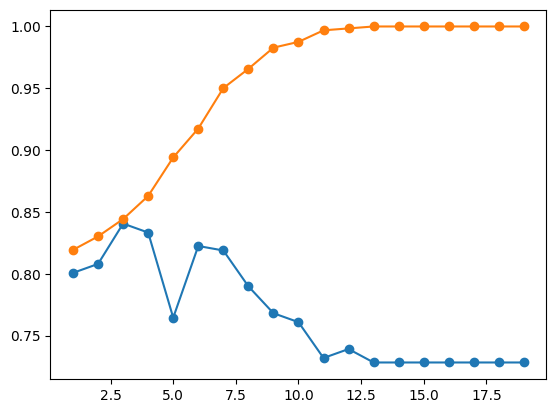

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

acc_tree_train = []
acc_tree_test = []



max_dep = np.arange(1, 20, 1)

for maxd in max_dep :
    d_tree = DecisionTreeClassifier(max_depth=maxd, random_state=42)
    d_tree.fit(X_train, Y_train)
    y_tree_train_predict = d_tree.predict(X_train)
    y_tree_test_predict = d_tree.predict(X_test)
    acc_tree_train.append(accuracy_score(Y_train, y_tree_train_predict))
    acc_tree_test.append(accuracy_score(Y_test, y_tree_test_predict))

plt.figure()
plt.plot(max_dep, acc_tree_test, marker='o')
plt.plot(max_dep, acc_tree_train, marker='o')
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1. Définir le modèle (avec un random_state pour la reproductibilité)
tree = DecisionTreeClassifier(random_state=42)

# 2. Définir la grille des hyperparamètres à tester
param_grid = {
    # Tester les profondeurs de 3 à 15, par pas de 2
    'max_depth': np.arange(1, 16, 1), 
    
    # Tester différents critères de division
    'criterion': ['gini', 'entropy'],
    
    # Tester le nombre minimum d'échantillons pour une division
    'min_samples_split': [2, 5, 10] 
}

# 3. Initialiser et lancer la recherche par grille
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='accuracy', # Le critère d'évaluation
    cv=5,               # Utiliser 5 plis de validation croisée
    verbose=1,          # Afficher la progression
    n_jobs=-1           # Utiliser tous les cœurs du processeur
)

# X_train, Y_train sont les données d'entraînement (ne pas utiliser X_test ici)
grid_search.fit(X_train, Y_train)

# 4. Afficher les meilleurs résultats
print("Meilleurs hyperparamètres:", grid_search.best_params_)
print("Meilleur score de CV:", grid_search.best_score_)

# 5. Récupérer le modèle optimal
best_tree = grid_search.best_estimator_

# Utiliser le modèle optimal sur le jeu de test final
final_accuracy = best_tree.score(X_test, Y_test)
print(f"Accuracy finale sur le jeu de test: {final_accuracy:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Meilleurs hyperparamètres: {'criterion': 'entropy', 'max_depth': np.int64(4), 'min_samples_split': 2}
Meilleur score de CV: 0.8270227713178293
Accuracy finale sur le jeu de test: 0.7935


# Forêts aléatoires

In [ ]:
#question supplémentaire : GridSearchCV avec une random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
forest = RandomForestClassifier(random_state=42)
# Grille de paramètres à tester (max_depth de 1 à la profondeur maximale trouvée)
param_grid = {
 'n_estimators': [200, 400, 600, 800, 1000, 2000],
 'max_depth': [5, 10, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': [None, 'sqrt'],
 'bootstrap': [True, False]
}
# Configurer GridSearchCV avec scoring = 'accuracy' et cv = 5
grid_search = RandomizedSearchCV(estimator=forest, param_distributions=param_grid, scoring='recall', cv=5, n_iter=100)
# Entraîner le modèle avec GridSearchCV
grid_search.fit(X_train, Y_train)
# Afficher les meilleurs résultats

print("Meilleure profondeur trouvée (scoring = 'accuracy') :")
print(grid_search.best_params_)
print("\nMeilleur score d'accuracy (cross-validation) :")
print(grid_search.best_score_)
# Tester les performances sur l'ensemble de test
y_test_pred = grid_search.best_estimator_.predict(X_test)
print("\nAccuracy sur l'ensemble de test :")
print(accuracy_score(Y_test, y_test_pred))
# Il est également possible de prendre le meilleur paramètre et d'entraîner un nouveau modèle
# si on ne veut pas utiliser grid_search.best_estimator_

Meilleure profondeur trouvée (scoring = 'accuracy') :
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}

Meilleur score d'accuracy (cross-validation) :
0.9098465473145779

Accuracy sur l'ensemble de test :
0.8442028985507246
